In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import warnings
import pywt
import pdb
warnings.filterwarnings("ignore")


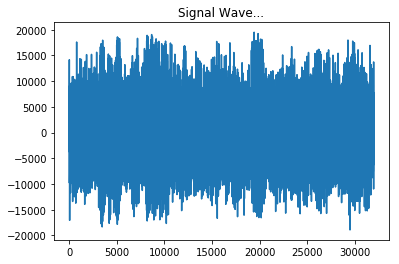

In [2]:
spf = wave.open('h_noise.wav','r')

#Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')


#If Stereo
if spf.getnchannels() == 2:
    print ('Just mono files')
    sys.exit(0)

plt.figure(1)
plt.title('Signal Wave...')
plt.plot(signal)
plt.show()

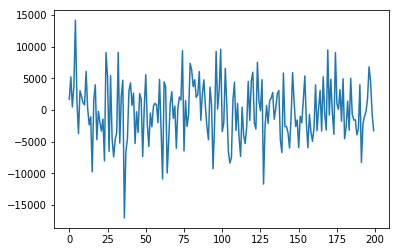

In [3]:
plt.plot(signal[:200])

In [4]:


def wrcoef(X, coef_type, coeffs, wavename, level):
    N = np.array(X).size
    a, ds = coeffs[0], list(reversed(coeffs[1:]))

    if coef_type =='a':
        return pywt.upcoef('a', a, wavename, level=level)[:N]
    elif coef_type == 'd':
        return pywt.upcoef('d', ds[level-1], wavename, level=level)[:N]
    else:
        raise ValueError("Invalid coefficient type: {}".format(coef_type))



level = 20
X = signal
coeffs = pywt.wavedec(X, 'haar', level=level)
A = wrcoef(X, 'a', coeffs, 'haar', level)
 
for i in range(level):
    name='D'+str(i+1)
    locals()['D'+str(i+1)]= wrcoef(X, 'd', coeffs, 'haar', i+1)
    


In [12]:

rec_sig = A 
 
for i in range(2,5):
    rec_sig = rec_sig + locals()['D'+str(i+1)]



In [13]:
from scipy.io import wavfile

sampleRate = 8000

data=np.int16(rec_sig/np.max(np.abs(rec_sig)) * 32767)

wavfile.write('test.wav', sampleRate , data)

In [14]:
import pywt
pywt.wavelist('sym')
print(len(rec_sig))

32000
